This file plots the prediction of parent nodes vs child nodes (left and right children)

In [1]:
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
from node import *
from SplittingPredictions import *

CNN = keras.models.load_model("../CNN_Non_Dense")
raw_data = pd.read_csv("IMDB_sentences.csv")

Creating the tree list for n given examples

In [2]:
total_tree_list = list()
n = 1000
tree_depth = 5

for i in range(0, n): # Iterating n times to get the tree_list for the required number of examples
    tree_list = Splitting_texts(raw_data.iloc[i].Sentences, tree_depth, 1, list(), delim=" ") # splitting the sentences into subsections
    tree_list = predictions(tree_list, CNN) # getting predictions for each subsection
    total_tree_list.append(tree_list)
    
    print("{}%".format(float(i/(n-1)*100)))
 

2023-10-09 11:31:47.737198: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


0.0%
0.10010010010010009%
0.20020020020020018%
0.3003003003003003%
0.40040040040040037%
0.5005005005005005%
0.6006006006006006%
0.7007007007007007%
0.8008008008008007%
0.9009009009009009%
1.001001001001001%
1.1011011011011012%
1.2012012012012012%
1.3013013013013013%
1.4014014014014013%
1.5015015015015014%
1.6016016016016015%
1.7017017017017018%
1.8018018018018018%
1.9019019019019021%
2.002002002002002%
2.1021021021021022%
2.2022022022022023%
2.3023023023023024%
2.4024024024024024%
2.5025025025025025%
2.6026026026026026%
2.7027027027027026%
2.8028028028028027%
2.902902902902903%
3.003003003003003%
3.1031031031031033%
3.203203203203203%
3.303303303303303%
3.4034034034034035%
3.5035035035035036%
3.6036036036036037%
3.7037037037037033%
3.8038038038038042%
3.903903903903904%
4.004004004004004%
4.1041041041041035%
4.2042042042042045%
4.3043043043043046%
4.404404404404405%
4.504504504504505%
4.604604604604605%
4.704704704704705%
4.804804804804805%
4.904904904904905%
5.005005005005005%
5.10510

Now creating the parent_list and the left_child and right_child lists for plotting

In [3]:
parent_list = list()
left_child_list = list()
right_child_list = list()


for i in range(0, n): # iterating over all tree_lists
    for j in range(0, len(total_tree_list[i])-1): # for the moment we will just be taking the A node as the centre node
        if(total_tree_list[i][j]['A'] != '.' and (total_tree_list[i][j+1]['A'] != '.' or total_tree_list[i][j+1]['B'] != '.')):
            parent_list.append(total_tree_list[i][j]['Prediction_A'])
            left_child_list.append(total_tree_list[i][j+1]['Prediction_A'])
            right_child_list.append(total_tree_list[i][j+1]['Prediction_B'])


Now Graphing

Text(0.5, 0.5, 'right child prediction')

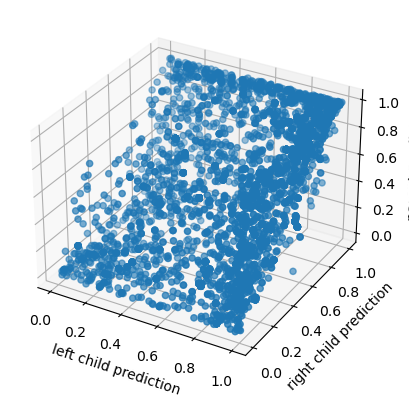

In [4]:
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(left_child_list, right_child_list, parent_list)
ax.set_zlabel("parent prediction")
ax.set_xlabel("left child prediction")
ax.set_ylabel("right child prediction")


In [5]:
plt.show()